# Pretprocesiranje

## Učitavanje biblioteka

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Učitavanje podataka

In [2]:
data = pd.read_csv('../../data/water_potability.csv')

# TODO: treba da se zameni ciljna promenljiva da je 0 - potable i 1 - not potable

## Pregled podataka

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
# Proveravamo da li postoje prazne vrednosti u podacima
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

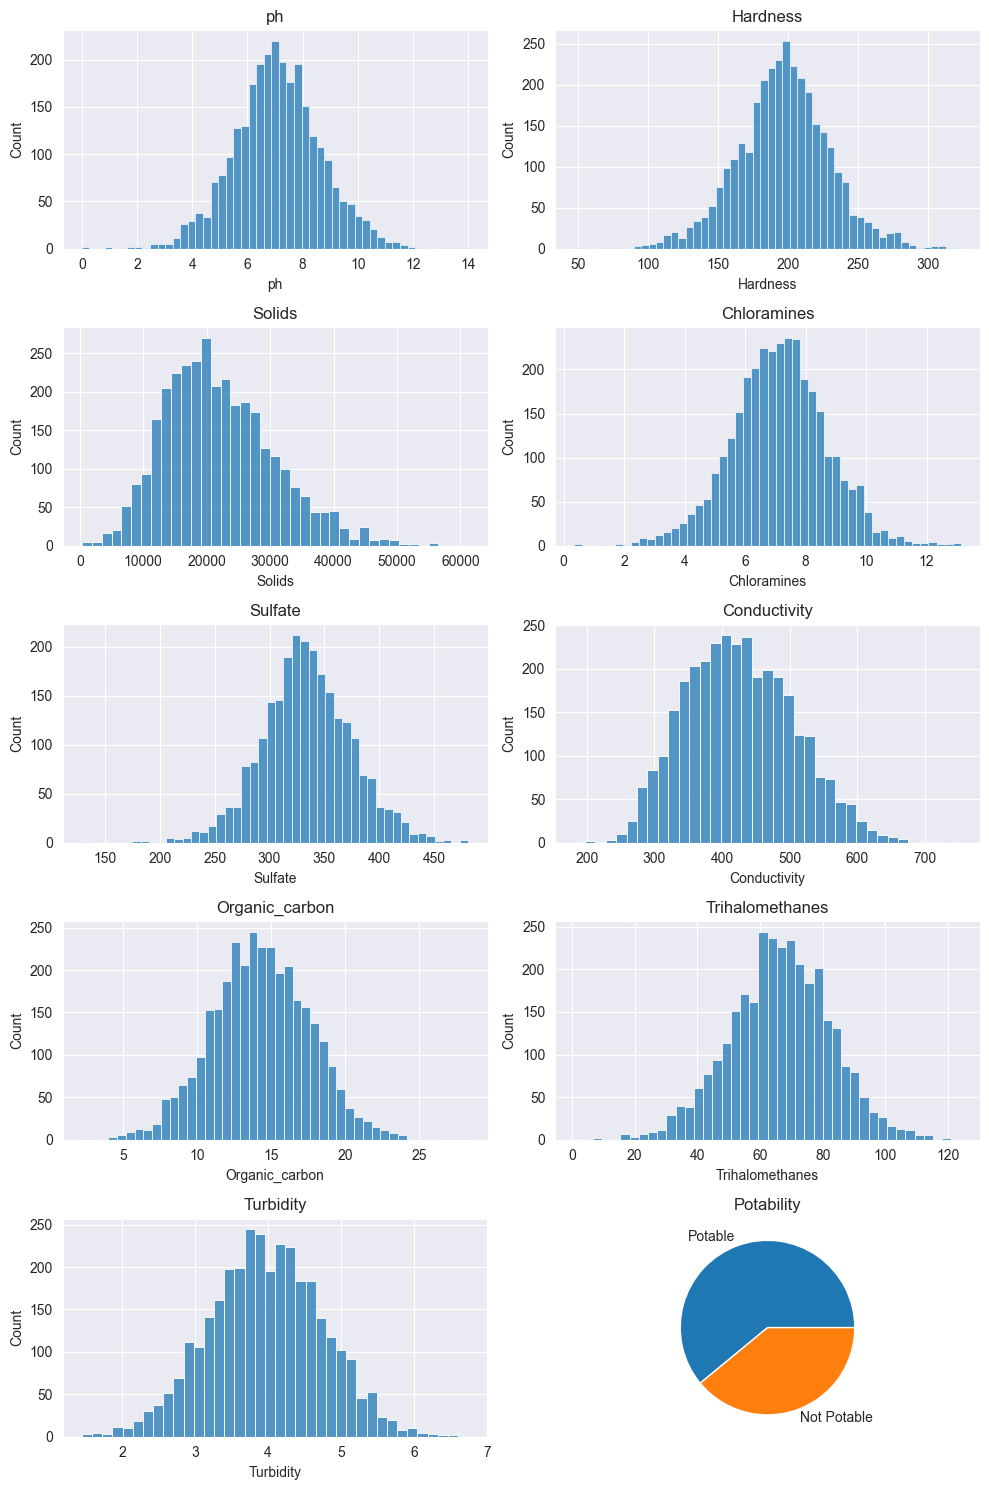

In [6]:
# Ne bi bilo lose da proverimo distribuciju svih atributa
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 15))
for i, (col_name, ax) in enumerate(zip(data.columns, axes.flatten())):
    if col_name == 'Potability':
        pie_data = data[col_name].value_counts()
        plt.pie(pie_data, labels=['Potable', 'Not Potable'])
    else:
        sns.histplot(data[col_name], ax=ax)
    ax.set_title(f'{col_name}')

plt.tight_layout()
plt.show()

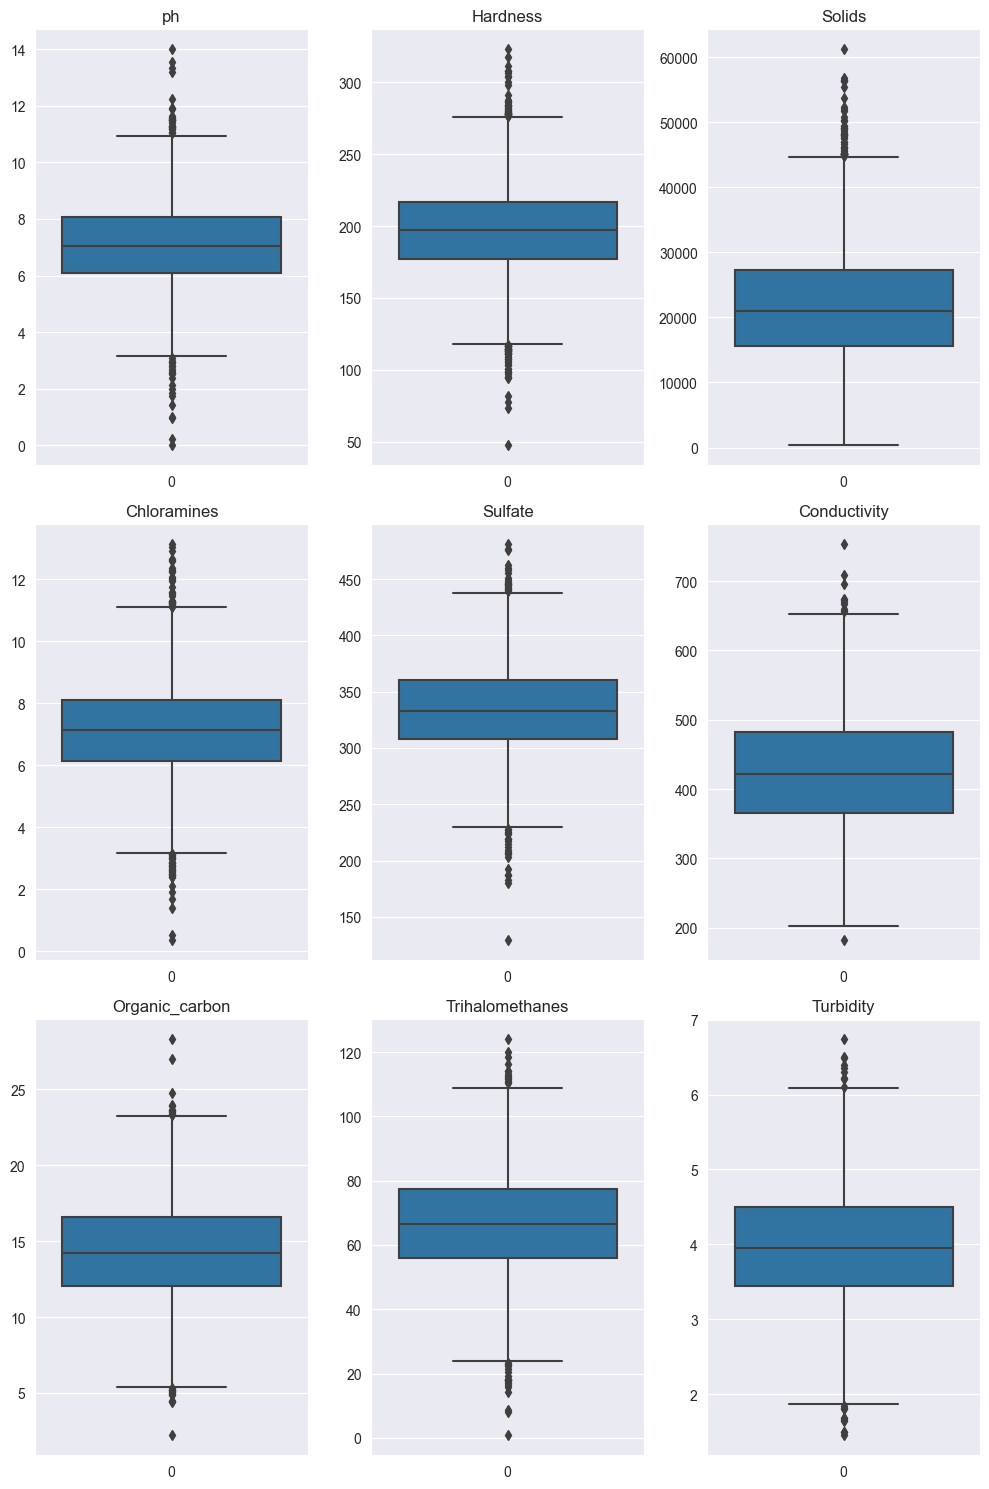

In [7]:
# TODO: Potencijalno bi trebalo otkloniti outliere
features = data.drop(['Potability'], axis=1)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 15))
for i, (col_name, ax) in enumerate(zip(features.columns, axes.flatten())):
    sns.boxplot(data[col_name], ax=ax)
    ax.set_title(f'{col_name}')

plt.tight_layout()
plt.show()

In [8]:
# Za kolone `ph`, `Sulfate` i `Trihalomethanes` postoje null/na vrednosti.
# Primenicemo dve metode za otklanjanje NA vrednosti:
# 1. Brisanje NA vrednosti
# 2. TODO: Popunjavanje NA vrednosti (sa srednjom vrednoscu svih podataka)
clean_data = data.dropna()

In [9]:
clean_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [10]:
# Proveravamo da li sada postoje duplikati u podacima
print(clean_data.duplicated().any())

False


In [11]:
# Potability atribut:
clean_data['Potability'].value_counts()

Potability
0    1200
1     811
Name: count, dtype: int64

In [12]:
X = clean_data.drop('Potability', axis=1)
y = clean_data['Potability']

In [13]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


In [14]:
y.head()

3    0
4    0
5    0
6    0
7    0
Name: Potability, dtype: int64

In [15]:
# Sada zelimo da podelimo na skup za treniranje i skup za testiranje
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y,
)

In [16]:
# Cuvamo obradjene podatke (pre standardnog skaliranja)
X_train.to_csv('./data/X_train.csv', index=False)
X_test.to_csv('./data/X_test.csv', index=False)
y_train.to_csv('./data/y_train.csv', index=False)
y_test.to_csv('./data/y_test.csv', index=False)

In [17]:
# Sada zelimo da skaliramo atribute tako sto cemo ih svesti na N(0,1) raspodelu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train[X_train.columns] = scaler.transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

In [18]:
X_train.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1.407000e+03,1.407000e+03,1.407000e+03,1.407000e+03,1.407000e+03,1.407000e+03,1.407000e+03,1.407000e+03,1.407000e+03
mean,5.050055e-18,-1.148888e-15,-3.383537e-16,-1.401390e-16,1.010011e-16,2.575528e-16,-8.963848e-17,-2.398776e-17,-8.585093e-17
std,1.000356e+00,1.000356e+00,1.000356e+00,1.000356e+00,1.000356e+00,1.000356e+00,1.000356e+00,1.000356e+00,1.000356e+00
min,-4.283493e+00,-3.648535e+00,-2.404812e+00,-2.989951e+00,-4.961884e+00,-2.824620e+00,-3.578335e+00,-3.622450e+00,-3.199760e+00
25%,-6.358800e-01,-5.923113e-01,-7.383994e-01,-6.300586e-01,-6.376339e-01,-7.341234e-01,-6.611606e-01,-6.497344e-01,-6.770766e-01
50%,-4.496129e-02,4.158271e-02,-1.406822e-01,-1.004843e-02,-1.665624e-03,-3.589262e-02,-1.702635e-02,-2.451446e-02,6.701345e-03
75%,6.252798e-01,6.248306e-01,6.340220e-01,6.211536e-01,6.310935e-01,7.342215e-01,6.997311e-01,6.632985e-01,7.150850e-01
max,4.335284e+00,3.623635e+00,4.011435e+00,3.797110e+00,3.602641e+00,4.047737e+00,3.756134e+00,3.599988e+00,3.186012e+00


In [19]:
X_test.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
mean,0.028378,0.013446,-0.001591,0.020695,0.022245,-0.077055,0.054173,-0.013986,-0.034036
std,0.947354,0.907775,1.009674,1.008294,1.008062,1.015744,0.941304,1.019807,0.958245
min,-3.093835,-3.034213,-2.506703,-3.627041,-3.540488,-2.422433,-2.760272,-3.177685,-3.146334
25%,-0.593744,-0.506807,-0.720171,-0.597200,-0.573630,-0.838533,-0.605437,-0.669226,-0.670764
50%,0.001839,0.034542,-0.084736,0.075555,-0.053037,-0.137360,0.028568,0.022796,-0.050487
75%,0.591179,0.561538,0.555031,0.626778,0.695205,0.572643,0.714692,0.710050,0.574143
max,3.928447,2.747960,3.877520,3.480751,3.493381,3.485761,2.681853,2.553902,3.185380


In [20]:
# Cuvamo obradjene podatke
X_train.to_csv('./data/X_train_scaled.csv', index=False)
X_test.to_csv('./data/X_test_scaled.csv', index=False)
y_train.to_csv('./data/y_train_scaled.csv', index=False)
y_test.to_csv('./data/y_test_scaled.csv', index=False)